# Data Cleaning/Visualizations

### By: Calvin Chen

In [1]:
from collections import OrderedDict
from datetime import timedelta, datetime
import random
import warnings
warnings.filterwarnings('ignore')


'''
Ideally, we would like to hire someone with strong design and front end programming skills,
capable of exposing in charts information that would otherwise be hidden, or at least not explicit,
in data sets.

As such we want to evaluate the candidates skills on presenting data in meaningful graphs.
We are not only interested in the candidate ability to implement the front end applications that
would present the graphs, we are also interested in the rationale behind the decisions.

The more hidden (or not explicit) meaningful information becomes evident in graphs the better.

Values:
    1. Autonomous action: We are a young team with no product manager.
       We need individuals who can go make important decisions by themselves and do the work
       needed to know that those decisions are the best way forward on their own.
    2. Communication: We are a remote team.  We require teammates who communicate themselves and
       their ideas well, and are fastidious about keeping online communication open.
    3. Innovation + Reflection: We want our team to always be striving to do the best.
       To achieve that, our members must be innovative in their solutions, and reflective about
       their innovations.


Project Description

Implement an app or widget to present visual information from a dataset of http requests

Project Purpose

To evaluate the ability to present useful information from a dataset in meaningful graphs.

Dependencies

Please write this project using vue.js.
We provide a CSV file containing the data required. It consists of 100k lines, each representing one
http request. Each line has request_time, service_name, http_method, consumer_id, latency_in_seconds
and response_code as columns.


'''


def generate_traffic_data(number_of_services, number_of_consumers, number_of_requests, start):
    methods = OrderedDict([('get', 0.2), ('post', 0.8)])
    response_codes = OrderedDict([('200', 0.8), ('500', 0.1), ('401', 0.1)])
    consumers = [f'consumer_{i}' for i in range(number_of_consumers)]
    services = [f'service_{i}' for i in range(number_of_consumers)]
    latencies_models = (
        lambda: random.gauss(0.01, 0.001),
        lambda: random.gauss(1, 0.0012),
        lambda: random.gauss(5, 0.1),
        lambda: random.randrange(5, 8, 1),
    )
    latencies_models_probabilities = (0.7, 0.2, 0.05, 0.05)
    last_time = start

    for i in range(number_of_requests):
        interval = random.randrange(0, 100, 1) * 0.05  # maximum interval between requests: 5s
        last_time = last_time + timedelta(seconds=interval)
        method = random.choices(list(methods.keys()), list(methods.values()))[0]
        consumer = random.choice(consumers)
        response = random.choices(list(response_codes.keys()), list(response_codes.values()))[0]
        service = random.choice(services)
        latency_model = random.choices(latencies_models, latencies_models_probabilities, k=1)[0]
        latency = latency_model()

        yield f'{last_time},{service},{method},{consumer},{latency},{response}\n'

In [4]:
if __name__ == '__main__':
    columns = 'request_time,service_name,http_method,consumer_id,latency_in_seconds,response_code\n'
    with open('traffic.csv', 'w') as f:
        f.write(columns)
        for line in generate_traffic_data(10, 5000, 100000, datetime(2017, 1, 1)):
            f.write(line)

### Converts csv to json

In [5]:
"""
This following script converts the given .csv into a .json file, which may or may not have been allowed, but other
than this data conversion, all other work pertaining to the dashboard was done in Vue.js.
"""

import csv  
import json  
  
# Open the CSV  
f = open('traffic.csv', 'rU' )  
reader = csv.DictReader(f, fieldnames = ("request_time", "service_name", "http_method", "consumer_id", "latency_in_seconds", "response_code"))  
# Get rid of CSV headers
next(reader)
# Parse the CSV into JSON 
out = json.dumps([row for row in reader])
print("JSON parsed!")
# Save the JSON  
f = open('traffic.json', 'w')
f.write(out)  
print("JSON saved!")

JSON parsed!
JSON saved!


In [3]:
import json 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('traffic.csv')
data.head()

,request_time,service_name,http_method,consumer_id,latency_in_seconds,response_code
0,2017-01-01 00:00:04.750000,service_1375,post,consumer_2747,0.010973,200
1,2017-01-01 00:00:05.200000,service_3119,get,consumer_1785,0.009397,200
2,2017-01-01 00:00:05.500000,service_3330,post,consumer_25,0.010789,200
3,2017-01-01 00:00:08.200000,service_2254,post,consumer_698,6.000000,200
4,2017-01-01 00:00:13.150000,service_3270,post,consumer_2695,0.008828,200


### Data Cleaning

In [5]:
def service_num(row):
    return int(row[8:])

def consumer_id(row):
    return int(row[9:])

def hour(row):
    return row.hour

def minute(row):
    return row.minute

def second(row):
    return row.second

In [6]:
data['service_num'] = data['service_name'].apply(service_num)
data['num_consumer_id'] = data['consumer_id'].apply(consumer_id)
data['request_datetime'] = pd.to_datetime(data['request_time'])
data['hour'] = data['request_datetime'].apply(hour)
data['minute'] = data['request_datetime'].apply(minute)
data['second'] = data['request_datetime'].apply(second)

In [7]:
data.head()

,request_time,service_name,http_method,consumer_id,latency_in_seconds,response_code,service_num,num_consumer_id,request_datetime,hour,minute,second
0,2017-01-01 00:00:04.750000,service_1375,post,consumer_2747,0.010973,200,1375,2747,2017-01-01 00:00:04.750,0,0,4
1,2017-01-01 00:00:05.200000,service_3119,get,consumer_1785,0.009397,200,3119,1785,2017-01-01 00:00:05.200,0,0,5
2,2017-01-01 00:00:05.500000,service_3330,post,consumer_25,0.010789,200,3330,25,2017-01-01 00:00:05.500,0,0,5
3,2017-01-01 00:00:08.200000,service_2254,post,consumer_698,6.000000,200,2254,698,2017-01-01 00:00:08.200,0,0,8
4,2017-01-01 00:00:13.150000,service_3270,post,consumer_2695,0.008828,200,3270,2695,2017-01-01 00:00:13.150,0,0,13


### Data Visualizations

/Users/calvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


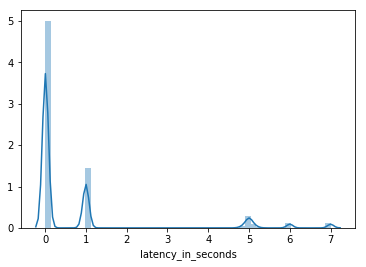

In [8]:
# Latency in seconds for the entire dataset
sns.distplot(data['latency_in_seconds']);

/Users/calvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


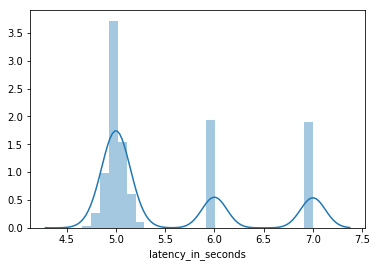

In [9]:
# Latency in seconds for requests that took longer than 4.5 seconds (slow)
slow = data[data['latency_in_seconds'] > 4.5]
sns.distplot(slow['latency_in_seconds']);

### Looking at the slow ones

In [10]:
slow['minute'].head()

3     0
7     0
13    0
14    0
43    1
Name: minute, dtype: int64

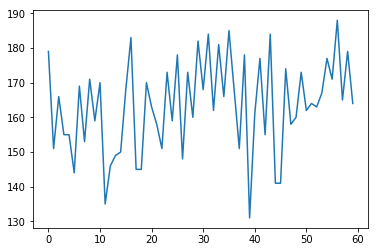

In [11]:
# Taking a look at the number of requests at different minute intervals to see if there's a correlation between
# the time of hour and the number of slow requests.
slow_minute = slow['minute'].value_counts().sort_index()
slow_minute.plot(kind='line');

### Looking at the most recent ones (1 hour ago)

In [12]:
latest = data['request_datetime'].sort_values(ascending=False)[99999]
an_hour_ago = latest - timedelta(hours=1)
recent = data[data['request_datetime'] > an_hour_ago]

In [13]:
recent.head()

,request_time,service_name,http_method,consumer_id,latency_in_seconds,response_code,service_num,num_consumer_id,request_datetime,hour,minute,second
98520,2017-01-03 19:44:38.750000,service_3820,post,consumer_1512,0.009546,200,3820,1512,2017-01-03 19:44:38.750,19,44,38
98521,2017-01-03 19:44:40.150000,service_1082,post,consumer_3295,0.008860,200,1082,3295,2017-01-03 19:44:40.150,19,44,40
98522,2017-01-03 19:44:41.700000,service_1110,post,consumer_2496,0.008026,200,1110,2496,2017-01-03 19:44:41.700,19,44,41
98523,2017-01-03 19:44:41.800000,service_2981,post,consumer_4181,0.011108,401,2981,4181,2017-01-03 19:44:41.800,19,44,41
98524,2017-01-03 19:44:42.500000,service_2167,get,consumer_2619,0.009420,200,2167,2619,2017-01-03 19:44:42.500,19,44,42


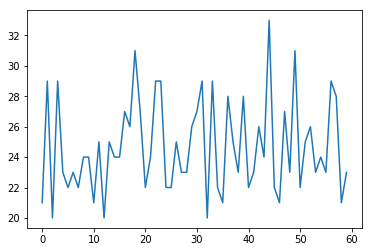

In [14]:
# Taking a look at the number of requests at different minute intervals to see the distribution of requests
# for the past hour.
rec_min = recent['minute'].value_counts().sort_index()
rec_min.plot(kind='line');

/Users/calvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


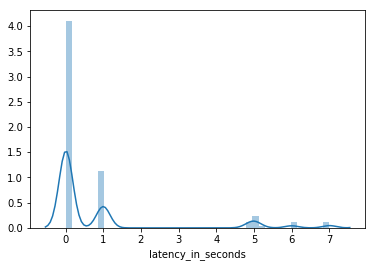

In [15]:
# Latency in seconds for requests in the last hour
sns.distplot(recent['latency_in_seconds']);

### Taking a look at different time intervals

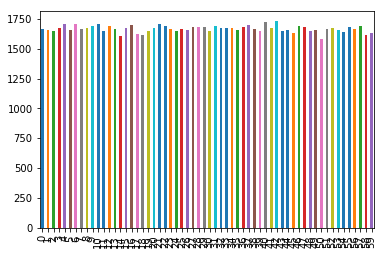

In [16]:
# Taking a look by the minute to see if there are any minutes throughout the day that have a higher number of requests
normal_minute = data['minute'].value_counts().sort_index()
normal_minute.plot(kind='bar');

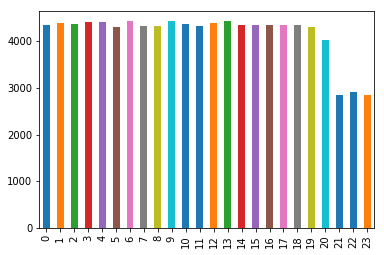

In [17]:
# Taking a look by the hour to see if there are any hours throughout the day that have a higher number of requests.
hour_values = data['hour'].value_counts().sort_index()
hour_values.plot(kind='bar');